# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import plotly.express as px
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso

In [128]:
try:
    gi_full = pd.read_csv('/datasets/gold_industry_full.csv')
    gi_test = pd.read_csv('/datasets/gold_industry_test.csv')
    gi_train = pd.read_csv('/datasets/gold_industry_train.csv')
except:
    gi_full = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/final_project_2/gold_industry_full.csv')
    gi_test = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/final_project_2/gold_industry_test.csv')
    gi_train = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/final_project_2/gold_industry_train.csv')

In [129]:
display(gi_full.shape)
display(gi_test.shape)
display(gi_train.shape)

(19439, 87)

(4860, 53)

(14579, 87)

In [130]:
display(gi_full.head(2))
display(gi_test.head(2))
display(gi_train.head(2))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514


In [131]:
display(gi_full.info())
display(gi_test.info())
display(gi_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

In [132]:
display(gi_full.duplicated().sum())
display(gi_test.duplicated().sum())
display(gi_train.duplicated().sum())

0

0

0

In [133]:
display(gi_full.isna().sum().sum())
display(gi_test.isna().sum().sum())
display(gi_train.isna().sum().sum())

4481

375

3050

In [134]:
gi_full['date'] = pd.to_datetime(gi_full['date'])
gi_train['date'] = pd.to_datetime(gi_train['date'])
gi_test['date'] = pd.to_datetime(gi_test['date'])

In [135]:
gi_full.index = gi_full['date']
gi_train.index = gi_train['date']
gi_test.index = gi_test['date']

In [136]:
gi_full.drop('date', axis = 1, inplace = True)
gi_train.drop('date', axis = 1, inplace = True)
gi_test.drop('date', axis = 1, inplace = True)

In [138]:
gi_test['final.output.recovery'] = gi_full['final.output.recovery'].loc[gi_test.index]
gi_test['rougher.output.recovery'] = gi_full['rougher.output.recovery'].loc[gi_test.index]

In [142]:
gi_full = gi_full.fillna(method = 'bfill')

In [143]:
gi_full.isna().sum().sum()

0

In [145]:
gi_train_02 = gi_train.fillna(method = 'bfill')

In [146]:
gi_train_02.isna().sum().sum()

0

In [147]:
gi_full.columns

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_f

### Выводы по этапу "Подготовка данных"

1. Дубликаты отсутствуют
2. Пустые значений в сете full заполнил медианой, потом с помощью индексирования сопоставил данные для остальных сетов
3. Признак Date перевел в datetime и определил в качестве индекса

In [148]:
#параметры, связанные с содержанием золота на каждом из этапов
gi_full[['rougher.input.feed_au',
        'rougher.output.concentrate_au',
        'rougher.output.tail_au',
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.tail_au',
        'secondary_cleaner.output.tail_au',
        'final.output.concentrate_au',
        'final.output.tail_au']].head(2)

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,final.output.concentrate_au,final.output.tail_au
date,,,,,,,,
2016-01-15 00:00:00,6.486150,19.793808,1.170244,34.174427,2.106679,2.606185,42.192020,2.143149
2016-01-15 01:00:00,6.478583,20.050975,1.184827,34.118526,2.353017,2.488248,42.701629,2.224930


## Анализ данных

### Расчет эффективности 

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [149]:
C = gi_train_02['rougher.output.concentrate_au']
F = gi_train_02['rougher.input.feed_au']
T = gi_train_02['rougher.output.tail_au']

In [150]:
recovery = ((C*(F-T))/(F*(C-T)))*100

In [151]:
mae_recovery = mean_absolute_error(gi_train_02['rougher.output.recovery'], recovery)

In [152]:
print('При расчете, среднее абсолютное отклонение составило', round(mae_recovery))

При расчете, среднее абсолютное отклонение составило 0


### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [153]:
gi_test.columns

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_clea

In [154]:
gi_full.columns

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_f

**В тестовой выборке нет финальный данных, данных по хвостам, промежуточных выходных показателей по концентраии металлов**

In [155]:
gi_test_02 = gi_test.fillna(method = 'bfill')

In [156]:
gi_test_02.isna().sum().sum()

0

In [157]:
gi_test_02.shape

(4860, 54)

In [158]:
gi_full.isna().sum().sum()

0

# 2. Проанализируйте данные

## 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.

In [159]:
gi_full.columns

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_f

In [160]:
raw_material = gi_train_02[['rougher.input.feed_au', 'rougher.input.feed_ag','rougher.input.feed_pb']]
after_rougher = gi_train_02[['rougher.output.concentrate_au','rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']]
after_primary = gi_train_02[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']]
final = gi_train_02[['final.output.concentrate_au', 'final.output.concentrate_ag','final.output.concentrate_pb']]

In [161]:
print('raw_material_median')
display(raw_material.median())
print('------------------------')
print('after_rougher_median')
display(after_rougher.median())
print('------------------------')
print('after_primary_median')
display(after_primary.median())
print('------------------------')
print('final_median')
display(final.median())

raw_material_median


rougher.input.feed_au    8.225284
rougher.input.feed_ag    8.715859
rougher.input.feed_pb    3.524599
dtype: float64

------------------------
after_rougher_median


rougher.output.concentrate_au    20.329736
rougher.output.concentrate_ag    12.136445
rougher.output.concentrate_pb     7.705023
dtype: float64

------------------------
after_primary_median


primary_cleaner.output.concentrate_au    32.837748
primary_cleaner.output.concentrate_ag     8.555670
primary_cleaner.output.concentrate_pb    10.111975
dtype: float64

------------------------
final_median


final.output.concentrate_au    44.975014
final.output.concentrate_ag     5.118581
final.output.concentrate_pb    10.046303
dtype: float64

In [162]:
print('raw_material_mean')
display(raw_material.mean())
print('------------------------')
print('after_rougher_mean')
display(after_rougher.mean())
print('------------------------')
print('after_primary_mean')
display(after_primary.mean())
print('------------------------')
print('final_mean')
display(final.mean())

raw_material_mean


rougher.input.feed_au    8.352941
rougher.input.feed_ag    8.877460
rougher.input.feed_pb    3.593873
dtype: float64

------------------------
after_rougher_mean


rougher.output.concentrate_au    19.717470
rougher.output.concentrate_ag    11.944253
rougher.output.concentrate_pb     7.498953
dtype: float64

------------------------
after_primary_mean


primary_cleaner.output.concentrate_au    32.007535
primary_cleaner.output.concentrate_ag     8.468626
primary_cleaner.output.concentrate_pb     9.733144
dtype: float64

------------------------
final_mean


final.output.concentrate_au    43.979499
final.output.concentrate_ag     5.192026
final.output.concentrate_pb     9.923709
dtype: float64

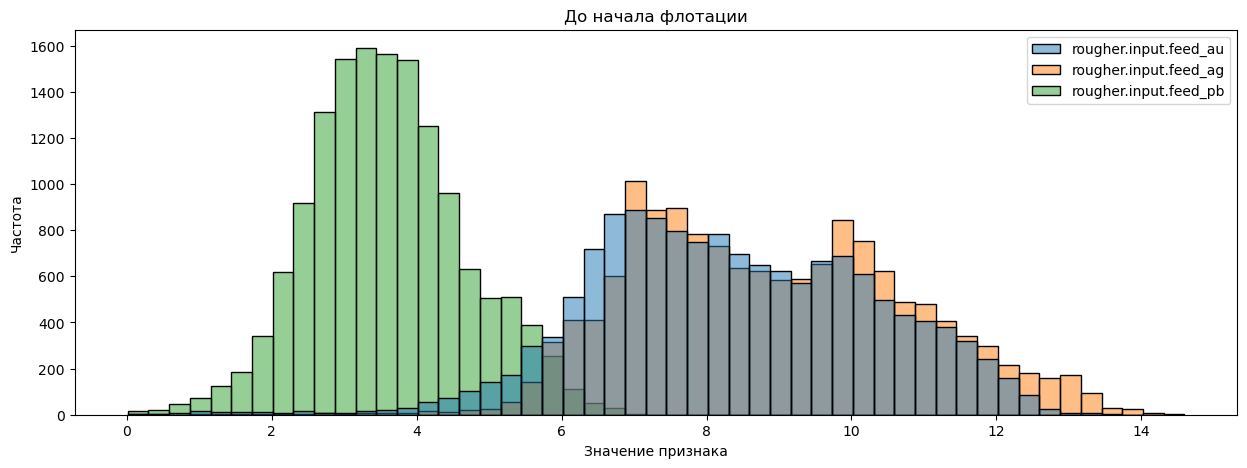

In [163]:
plt.figure(figsize = (15,5))
sns.histplot(raw_material)
plt.title('До начала флотации')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

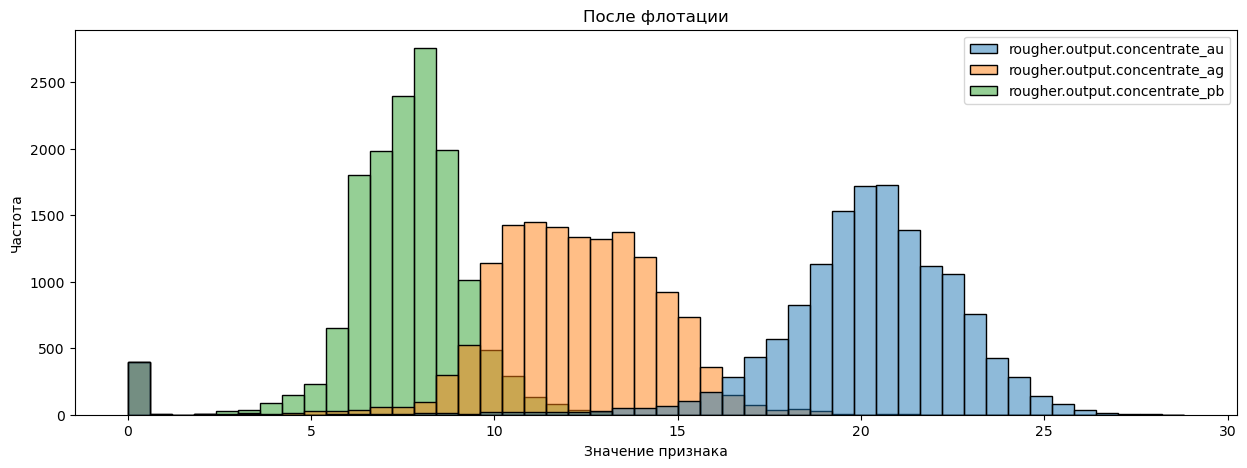

In [164]:
plt.figure(figsize = (15,5))
sns.histplot(after_rougher)
plt.title('После флотации')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

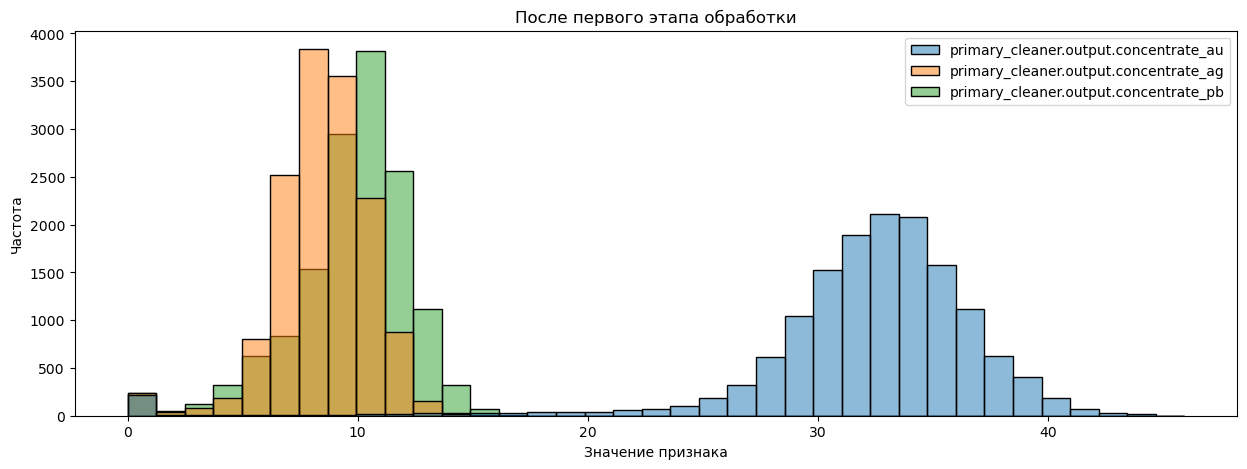

In [165]:
plt.figure(figsize = (15,5))
sns.histplot(after_primary)
plt.title('После первого этапа обработки')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

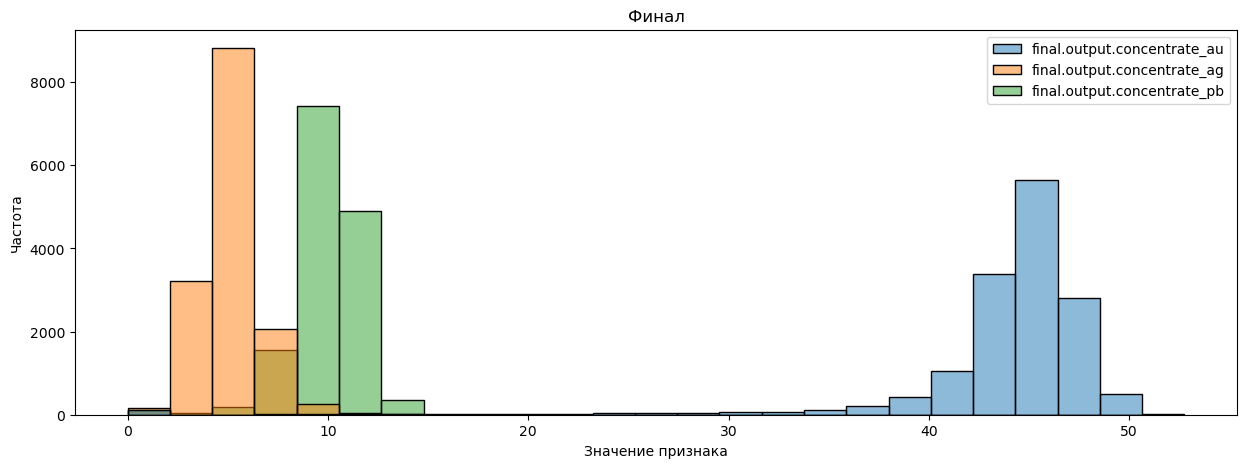

In [166]:
plt.figure(figsize = (15,5))
sns.histplot(final)
plt.title('Финал')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

In [167]:
def upper_fence(df):
    return df.quantile(0.75) + (df.quantile(0.75) - df.quantile(0.25))*1.5

In [168]:
def lower_fence(df):
    return df.quantile(0.25) - (df.quantile(0.75) - df.quantile(0.25))*1.5

In [169]:
gi_train_02.drop(gi_train_02[gi_train_02['rougher.output.concentrate_au'] < 10].index, inplace = True)

In [170]:
gi_train_02.drop(gi_train_02[gi_train_02['rougher.output.concentrate_ag'] < 5].index, inplace = True)

In [171]:
gi_train_02.drop(gi_train_02[gi_train_02['rougher.output.concentrate_pb'] < 3].index, inplace = True)

In [172]:
gi_train_02.drop(gi_train_02[gi_train_02['primary_cleaner.output.concentrate_au'] < 15].index, inplace = True)

In [173]:
gi_train_02.drop(gi_train_02[gi_train_02['primary_cleaner.output.concentrate_ag'] < 3].index, inplace = True)

In [174]:
gi_train_02.drop(gi_train_02[gi_train_02['primary_cleaner.output.concentrate_pb'] < 3].index, inplace = True)

In [175]:
gi_train_02.drop(gi_train_02[gi_train_02['final.output.concentrate_au'] < 30].index, inplace = True)

In [176]:
gi_train_02.drop(gi_train_02[gi_train_02['final.output.concentrate_ag'] < 3].index, inplace = True)

In [177]:
gi_train_02.drop(gi_train_02[gi_train_02['final.output.concentrate_ag'] > 13].index, inplace = True)

In [178]:
gi_train_02.drop(gi_train_02[gi_train_02['final.output.concentrate_pb'] < 5].index, inplace = True)

In [179]:
gi_train_02.reset_index(drop = True, inplace = True)

In [180]:
raw_material = gi_train_02[['rougher.input.feed_au', 'rougher.input.feed_ag','rougher.input.feed_pb']]
after_rougher = gi_train_02[['rougher.output.concentrate_au','rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']]
after_primary = gi_train_02[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']]
final = gi_train_02[['final.output.concentrate_au', 'final.output.concentrate_ag','final.output.concentrate_pb']]

**2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной**

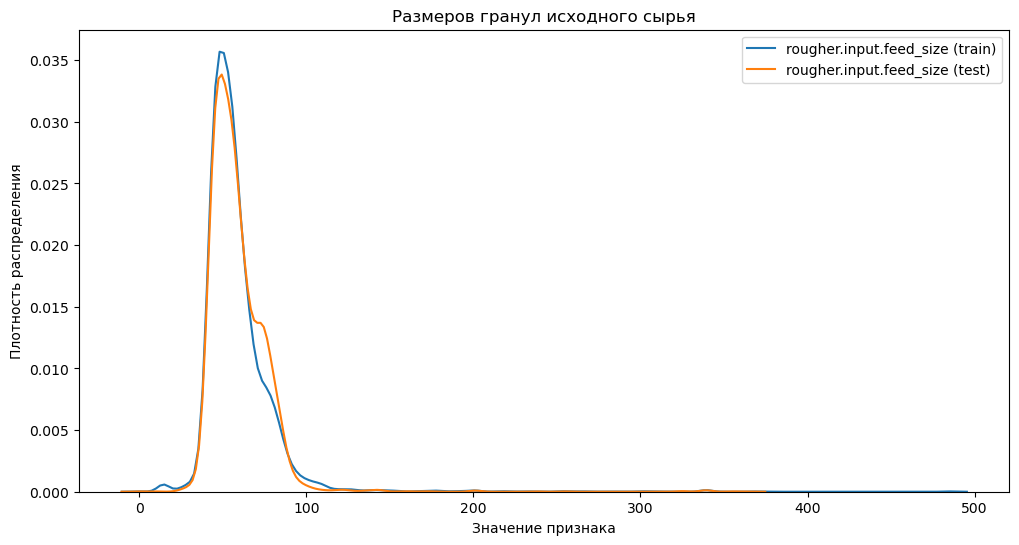

In [181]:
plt.figure(figsize = (12,6))
sns.kdeplot(gi_train_02['rougher.input.feed_size'], label='rougher.input.feed_size (train)')
plt.legend()
sns.kdeplot(gi_test_02['rougher.input.feed_size'], label= 'rougher.input.feed_size (test)')
plt.legend()
plt.title('Размеров гранул исходного сырья')
plt.xlabel('Значение признака')
plt.ylabel('Плотность распределения')
plt.show()

**Выводы:**
 - выборки схожи, поэтому можно приступить к построению модели

**2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате**

In [182]:
raw_material.apply(lambda x: x.sum(), axis = 1)
after_rougher.apply(lambda x: x.sum(), axis = 1)
after_primary.apply(lambda x: x.sum(), axis = 1)
final.apply(lambda x: x.sum(), axis = 1)
print()

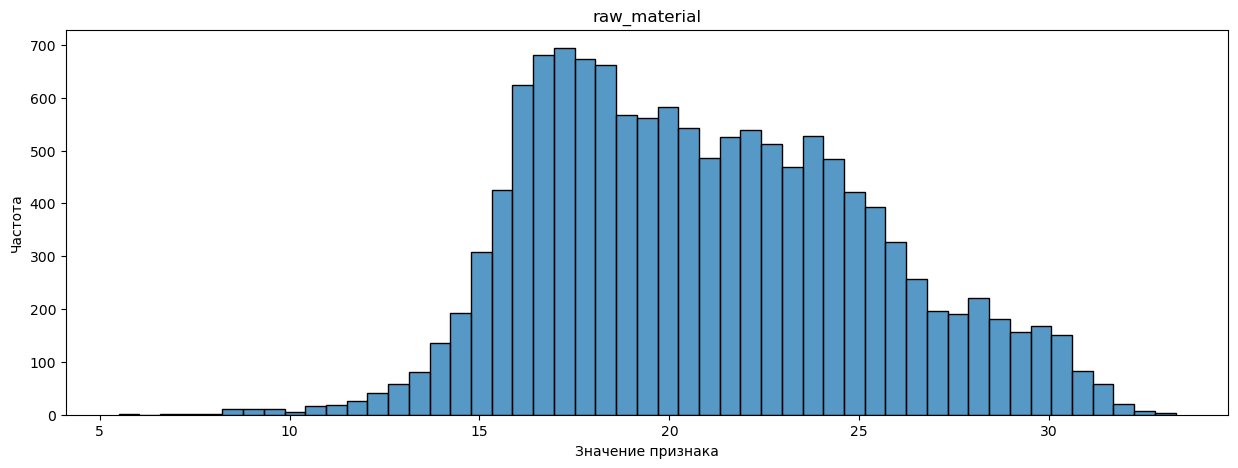

In [183]:
plt.figure(figsize = (15,5))
sns.histplot(raw_material.apply(lambda x: x.sum(), axis = 1))
plt.title('raw_material')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

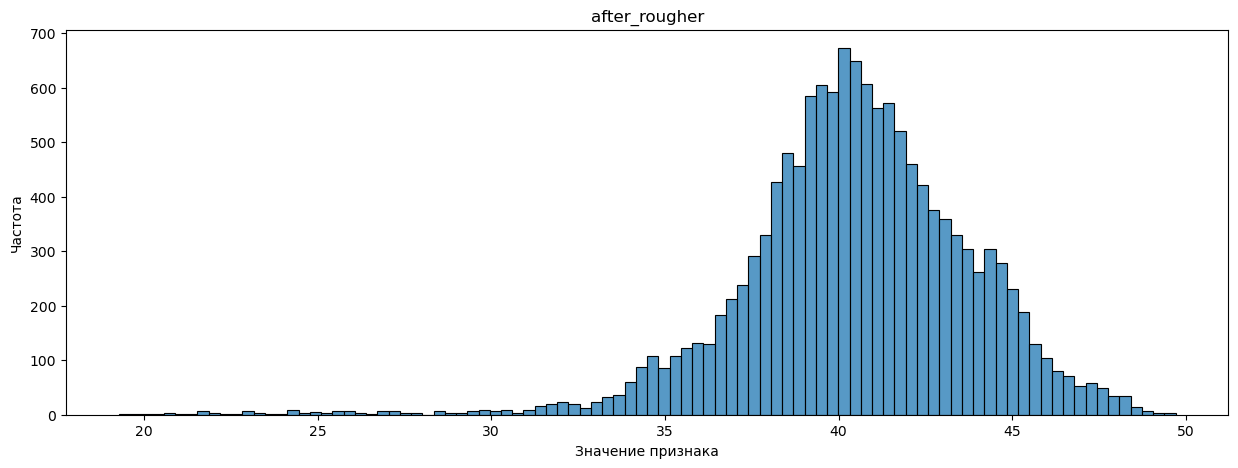

In [184]:
plt.figure(figsize = (15,5))
sns.histplot(after_rougher.apply(lambda x: x.sum(), axis = 1))
plt.title('after_rougher')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

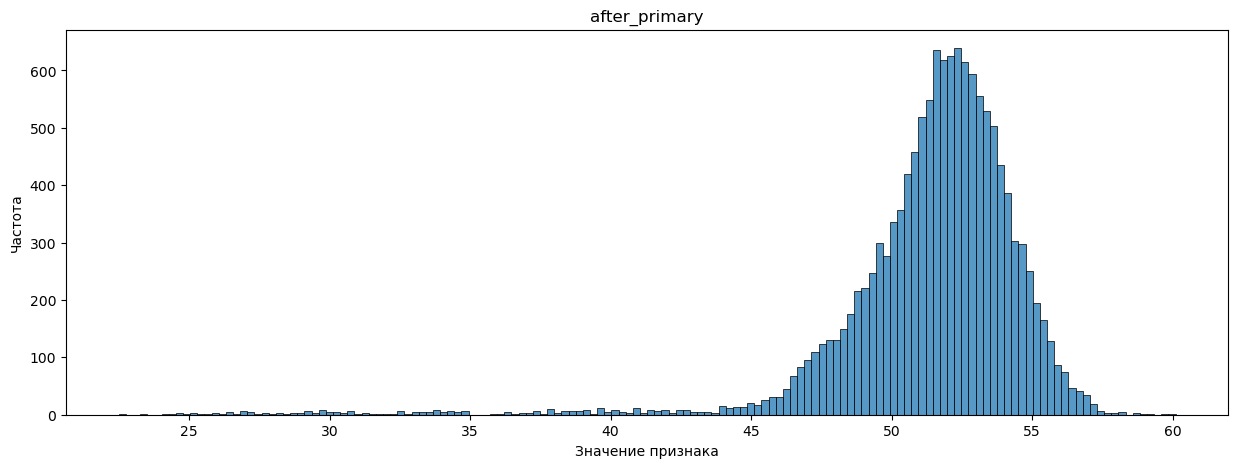

In [185]:
plt.figure(figsize = (15,5))
sns.histplot(after_primary.apply(lambda x: x.sum(), axis = 1))
plt.title('after_primary')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

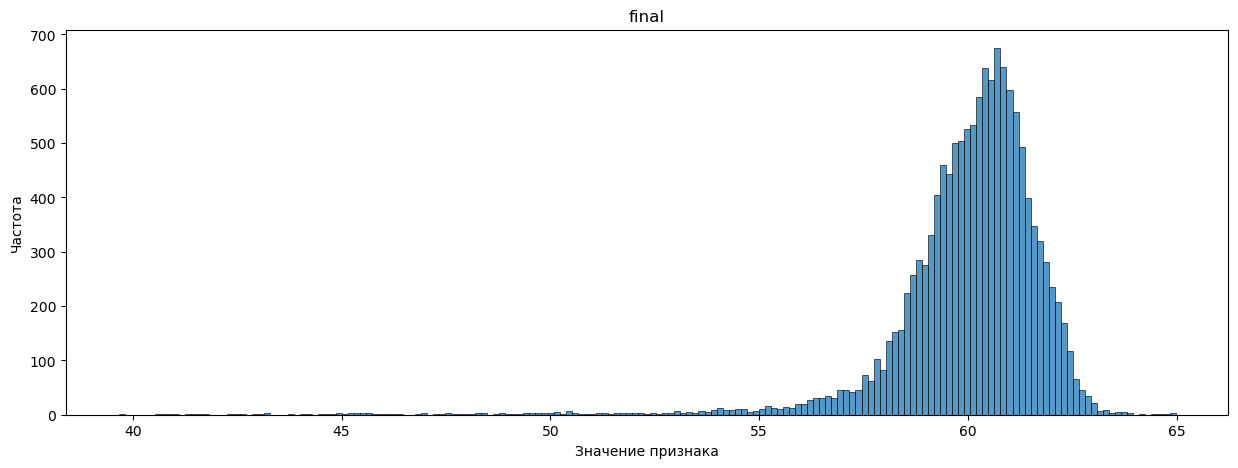

In [186]:
plt.figure(figsize = (15,5))
sns.histplot(final.apply(lambda x: x.sum(), axis = 1))
plt.title('final')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

### Выводы:
    После каждого из этапов, концентрация золота увеличивается, а концентрация остальных металов уменьшается

## Модель

In [190]:
def smape(y_real, y_pred):
    return 100/len(y_real) * np.sum(2 * np.abs(y_pred - y_real) / (np.abs(y_real) + np.abs(y_pred)))

In [191]:
def final_smape(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

In [192]:
custome_score = make_scorer(smape, greater_is_better=False)

In [193]:
gi_train.drop(gi_train[gi_train['final.output.recovery'] == 0].index, inplace = True)

In [194]:
gi_train.drop(gi_train[gi_train['rougher.output.recovery'] == 0].index, inplace = True)

In [195]:
gi_train_02.reset_index(drop = True, inplace = True)
gi_test_02.reset_index(drop = True, inplace = True)

In [196]:
gi_train_target_final = gi_train_02['final.output.recovery']
gi_train_target_rougher = gi_train_02['rougher.output.recovery']
gi_test_target_final = gi_test_02['final.output.recovery']
gi_test_target_rougher = gi_test_02['rougher.output.recovery']
gi_test_features = gi_test_02.drop(['final.output.recovery','rougher.output.recovery'], axis = 1)
gi_train_features = gi_train_02[gi_test_features.columns]

In [197]:
scaler = StandardScaler()
scaler.fit(gi_train_features)
gi_train_features_scaled = pd.DataFrame(scaler.transform(gi_train_features), columns = gi_train_features.columns)
gi_test_features_scaled = pd.DataFrame(scaler.transform(gi_test_features), columns = gi_test_features.columns)

### Кросс-валидация

**LinearRegression**

In [198]:
model = LinearRegression()
scores_lr_f = cross_val_score(model, gi_train_features_scaled, gi_train_target_final, cv=5, scoring=custome_score)
print('sMAPE = ', -scores_lr_f.mean())
print(scores_lr_f)

sMAPE =  9.513230345040553
[-10.54073702  -8.23751946  -8.82244079  -8.42303575 -11.5424187 ]


In [199]:
model = LinearRegression()
scores_lr_r = cross_val_score(model, gi_train_features_scaled, gi_train_target_rougher, cv=5, scoring=custome_score)
print('sMAPE = ', -scores_lr_r.mean())
print(scores_lr_r)

sMAPE =  7.176443389941094
[-9.18542596 -5.5914919  -7.06047381 -4.74493027 -9.29989501]


**итового значение sMAPE**

In [200]:
final_smape(-scores_lr_r.mean(), -scores_lr_f.mean())

8.929033606265687

**Lasso**

In [201]:
best_model = None
best_scores_losso_f = 1000
for alp in np.arange(0.1, 1.01, 0.1):
    model = Lasso(alpha=alp, max_iter=2500, random_state=12345)
    scores_losso_f = cross_val_score(model, gi_train_features_scaled, gi_train_target_final, cv=5, scoring=custome_score)
    if -scores_losso_f.mean() < best_scores_losso_f:
        best_scores_losso_f = -scores_losso_f.mean()
        best_model = model
print('sMAPE = ', best_scores_losso_f)
print('best_model =', best_model)

sMAPE =  8.273831440451946
best_model = Lasso(alpha=0.6, max_iter=2500, random_state=12345)


In [202]:
best_model = None
best_scores_losso_r = 1000
for alp in np.arange(0.1, 1.01, 0.1):
    model = Lasso(alpha=alp, max_iter=2500, random_state=12345)
    scores_losso_r = cross_val_score(model, gi_train_features_scaled, gi_train_target_rougher, cv=5, scoring=custome_score)
    if -scores_losso_r.mean() < best_scores_losso_r:
        best_scores_losso_r = -scores_losso_r.mean()
        best_model = model
print('sMAPE = ', best_scores_losso_r)
print('best_model =', best_model)

sMAPE =  6.079762552782721
best_model = Lasso(alpha=0.7000000000000001, max_iter=2500, random_state=12345)


**итового значение sMAPE**

In [203]:
final_smape(-scores_losso_r.mean(), -scores_losso_f.mean())

7.850366516562848

**RandomForestRegressor**

In [104]:
%%time
best_scores_rfr_f = 100
best_model = None
best_scores_2 = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=12345,n_estimators=est,max_depth=depth)
        scores = cross_val_score(model, gi_train_features_scaled, gi_train_target_final, cv=5, scoring=custome_score)
        scores_mean_rfr_f = -scores.mean()
        if scores_mean_rfr_f < best_scores_rfr_f:
            best_scores_rfr_f = scores_mean_rfr_f
            best_model = model
            best_scores_2 = -scores
            best_est = est
            best_depth = depth

print('sMAPE = ', best_scores_rfr_f)
print('best_model =', best_model)
print(best_scores_2)

sMAPE =  8.539916760920761
best_model = RandomForestRegressor(max_depth=2, n_estimators=40, random_state=12345)
[9.29746886 7.21403165 8.88464978 8.00481432 9.29861919]
CPU times: user 19min 21s, sys: 1.64 s, total: 19min 23s
Wall time: 19min 25s


In [124]:
%%time
best_scores_rfr_r = 100
best_model = None
best_scores_2 = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=12345,n_estimators=est,max_depth=depth)
        scores = cross_val_score(model, gi_train_features_scaled, gi_train_target_rougher, cv=5, scoring=custome_score)
        scores_mean_rfr_r = -scores.mean()
        if scores_mean_rfr_r < best_scores_rfr_r:
            best_scores_rfr_r = scores_mean_rfr_r
            best_model = model
            best_scores_2 = -scores
            best_est = est
            best_depth = depth

print('sMAPE = ', best_scores_rfr_r)
print('best_model =', best_model)
print(best_scores_2)

sMAPE =  6.316820502388564
best_model = RandomForestRegressor(max_depth=4, n_estimators=50, random_state=12345)
[7.89101979 4.78831369 6.88034105 5.51213546 6.51229252]
CPU times: user 19min 4s, sys: 1.08 s, total: 19min 5s
Wall time: 19min 7s


**итового значение sMAPE**

In [126]:
final_smape(best_scores_rfr_r, best_scores_rfr_f)

7.984142696287712

**DecisionTreeRegressor**

In [111]:
best_scores_dtr_f = 100
best_model = None
best_scores_2 = 0
for depth in range(1,10):
    model = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scores = cross_val_score(model, gi_train_features_scaled, gi_train_target_final, cv=5, scoring=custome_score)
    scores_mean_dtr_f = -scores.mean()
    if scores_mean_dtr_f < best_scores_dtr_f:
        best_scores_dtr_f = scores_mean_dtr_f
        best_model = model
        best_scores_2 = -scores        
print('sMAPE = ', round(best_scores_dtr_f,2))
print('Лучшая модель =', best_model)
print(best_scores_2)

sMAPE =  8.87
Лучшая модель = DecisionTreeRegressor(max_depth=2, random_state=12345)
[ 9.44223327  7.2582901  10.35981097  7.96812093  9.31145694]


In [113]:
best_scores_dtr_r = 100
best_model = None
best_scores_2 = 0
for depth in range(1,10):
    model = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scores = cross_val_score(model, gi_train_features_scaled, gi_train_target_rougher, cv=5, scoring=custome_score)
    scores_mean_dtr_r = -scores.mean()
    if scores_mean_dtr_r < best_scores_dtr_r:
        best_scores_dtr_r = scores_mean_dtr_r
        best_model = model
        best_scores_2 = -scores    
print('sMAPE = ', round(best_scores_dtr_r,2))
print('Лучшая модель =', best_model)
print(best_scores_2)

sMAPE =  6.44
Лучшая модель = DecisionTreeRegressor(max_depth=3, random_state=12345)
[8.26870243 4.93163639 6.74461225 5.65810619 6.62062639]


**итового значение sMAPE**

In [114]:
final_smape(best_scores_dtr_r, best_scores_dtr_f)

8.262171012710473

**После прогонки на кросс-валидации, получились следующие результаты:**
 - для **'final.output.recovery'** лучшая модель - best_model = Lasso(alpha=0.6, max_iter=2500), sMAPE = 8.273831440451946)
 - для **'rougher.output.recovery'** лучшая модель Lasso(alpha=0.7000000000000001, max_iter=2500) sMAPE =  6.079762552782721
 - **Итоговое значение sMAPE** = 7.850366516562848


Используем эти модели для прогонки на тестовой выборке и вычисления **итогового** значения **sMAPE**

**DummyRegressor**

In [115]:
model = DummyRegressor(strategy = 'mean')
model.fit(gi_train_features_scaled, gi_train_target_final)
predicted = model.predict(gi_test_features_scaled)
smape_dr_f = smape(gi_test_target_final,predicted)
print('DummyRegressor для final.output.recovery')
print('sMAPE = ', round(smape_dr_f,2))

DummyRegressor для final.output.recovery
sMAPE =  9.23


In [116]:
model = DummyRegressor(strategy = 'mean')
model.fit(gi_train_features_scaled, gi_train_target_rougher)
predicted = model.predict(gi_test_features_scaled)
smape_dr_r = smape(gi_test_target_rougher,predicted)
print('DummyRegressor для rougher.output.recovery')
print('sMAPE = ', round(smape_dr_r,2))

DummyRegressor для rougher.output.recovery
sMAPE =  6.05


**Итоговое значение sMAPE константной модели**

In [117]:
final_smape(smape_dr_r, smape_dr_f)

8.432085193309993

**Прогонка на тестовой выборке**

In [204]:
model = Lasso(alpha=0.6, max_iter=2500, random_state=12345)
model.fit(gi_train_features_scaled, gi_train_target_final)
predicted = model.predict(gi_test_features_scaled)
smape_lasso_f = smape(gi_test_target_final,predicted)
smape_lasso_f

8.132360742429903

In [205]:
model = Lasso(alpha=0.7, max_iter=2500, random_state=12345)
model.fit(gi_train_features_scaled, gi_train_target_rougher)
predicted = model.predict(gi_test_features_scaled)
smape_lasso_r = smape(gi_test_target_rougher,predicted)
smape_lasso_r

4.828570219932643

**итового значение sMAPE**

In [206]:
final_smape(smape_lasso_r, smape_lasso_f)

7.306413111805588

Итоговое значение после прогонки составило 7.306413111805588, что меньше чем значение константной модели, поэтому модель принимается 

### Выводы 

1. Проведен анализ выборок, удалены экстримальные значения для подготовки к построению моделей
1. Были построены модели для предсказания 2 целевых показателей('final.output.recovery' и 'rougher.output.recovery')
2. Для проверки использовался метод кросс-валидации
     - для **'final.output.recovery'** лучшая модель - best_model = Lasso(alpha=0.6, max_iter=2500), sMAPE = 8.273831440451946)
     - для **'rougher.output.recovery'** лучшая модель Lasso(alpha=0.7000000000000001, max_iter=2500) sMAPE =  6.079762552782721
     - лучшее **Итоговое значение sMAPE** после кросс-валидации  = 7.850366516562848
5. **Итоговое значение sMAPE константной модели** составило 8.432085193309993
4. **Итоговое значение sMAPE** после прогонки на тестовой выборке составило 7.306413111805588
